In [9]:
# @title Import Necessary Packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# HW 9 - Advanced Plotting
### Due November 11, 2024 at 11:59pm
Welcome to your last problem set of the semester! (\*confetti\*) It's time for the hardest but also coolest homework of the course. Have fun!

## 1) Subplot Plotting Practice

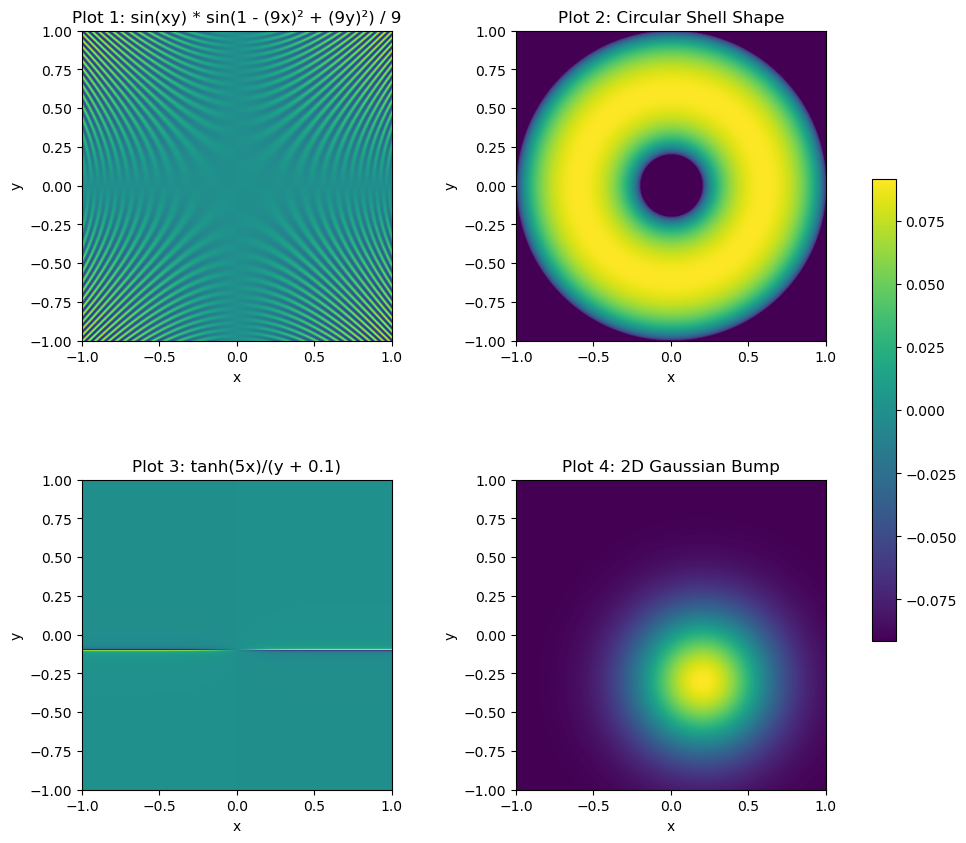

In [10]:
# @markdown Plot these functions on a 2 X 2 grid of subplots (4 plots total). Use fun colormaps!


# @markdown Plot 1 (Top Left):

# @markdown $$ f(x,y) = \frac{sin(xy) * sin(1-(9x)^2 + (9y)^2)}{9} $$
# @markdown Plot 2 (Top Right):
# @markdown $$ f(x,y) = (0.4^2 -(0.6-(x^2+y^2)^{\!1/2})^2)^{\!1/2} $$
# @markdown Plot 3 (Bottom Left):
# @markdown $$ f(x, y) = \frac{\tanh(5x)}{y + 0.1}$$
# @markdown Plot 4 (Bottom Right)"
# @markdown $$ f(x, y) = \exp(-5((x - 0.2)^2 + (y + 0.3)^2))$$

# @markdown Each subplot should have it's own title, and x and y labels for each plot. Each of these is an interesting shape or structure. Create a markdown cell below your plotting cell describing what you see in each plot.

# @markdown Challenge: Use the same colormap for the whole figure (all 4 subplots).

# @markdown *Hint: Some of the functions may require a different domain (for the x values) for the function to be defined. Make sure you take this into account.*

# Your code here

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

cmap = 'viridis'

# ---------- Plot 1: Top Left ----------
x1 = np.linspace(-1, 1, 400)
y1 = np.linspace(-1, 1, 400)
X1, Y1 = np.meshgrid(x1, y1)
Z1 = (np.sin(X1 * Y1) * np.sin(1 - (9 * X1)**2 + (9 * Y1)**2)) / 9

im1 = axs[0, 0].imshow(Z1, extent=[-1, 1, -1, 1], cmap=cmap, origin='lower')
axs[0, 0].set_title("Plot 1: sin(xy) * sin(1 - (9x)² + (9y)²) / 9")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("y")

# ---------- Plot 2: Top Right ----------
x2 = np.linspace(-1, 1, 400)
y2 = np.linspace(-1, 1, 400)
X2, Y2 = np.meshgrid(x2, y2)
R = np.sqrt(X2**2 + Y2**2)
Z2 = np.sqrt(np.maximum(0, 0.4**2 - (0.6 - R)**2))  # ensure real values

im2 = axs[0, 1].imshow(Z2, extent=[-1, 1, -1, 1], cmap=cmap, origin='lower')
axs[0, 1].set_title("Plot 2: Circular Shell Shape")
axs[0, 1].set_xlabel("x")
axs[0, 1].set_ylabel("y")

# ---------- Plot 3: Bottom Left ----------
x3 = np.linspace(-1, 1, 400)
y3 = np.linspace(-1, 1, 400)
X3, Y3 = np.meshgrid(x3, y3)
Z3 = np.tanh(5 * X3) / (Y3 + 0.1)

im3 = axs[1, 0].imshow(Z3, extent=[-1, 1, -1, 1], cmap=cmap, origin='lower')
axs[1, 0].set_title("Plot 3: tanh(5x)/(y + 0.1)")
axs[1, 0].set_xlabel("x")
axs[1, 0].set_ylabel("y")

# ---------- Plot 4: Bottom Right ----------
x4 = np.linspace(-1, 1, 400)
y4 = np.linspace(-1, 1, 400)
X4, Y4 = np.meshgrid(x4, y4)
Z4 = np.exp(-5 * ((X4 - 0.2)**2 + (Y4 + 0.3)**2))

im4 = axs[1, 1].imshow(Z4, extent=[-1, 1, -1, 1], cmap=cmap, origin='lower')
axs[1, 1].set_title("Plot 4: 2D Gaussian Bump")
axs[1, 1].set_xlabel("x")
axs[1, 1].set_ylabel("y")


fig.colorbar(im1, ax=axs, location='right', shrink=0.6)

plt.show()


## 2) Random Plotting Practice

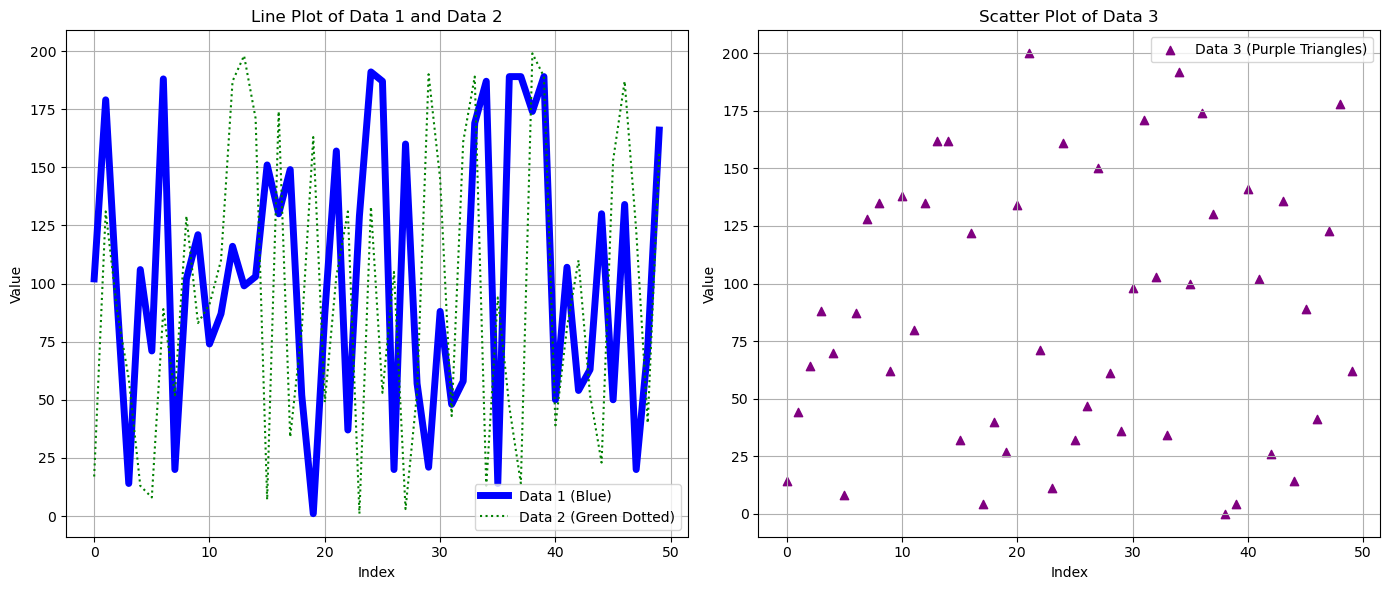

In [11]:
# @markdown This problem focuses on generating and visualizing random data in two different types of plots. First, you will create three lists of random numbers, each containing 50 elements, with values ranging from 0 to 200. Then, you'll create two instead of vertical subplots:

# @markdown - The left plot should display the first list of random data as a blue line with a line width of 5, and the second list in green with a dotted line style.

# @markdown - The right plot should be a scatter plot of the third list, using purple triangles as markers. The x-coordinate should correspond to the position of each element in the list.

# @markdown Make sure to add appropriate titles and legends to each subplot.

# Your code here


np.random.seed(42)  
data1 = np.random.randint(0, 201, 50)
data2 = np.random.randint(0, 201, 50)
data3 = np.random.randint(0, 201, 50)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left Plot: Line plots
ax1.plot(data1, color='blue', linewidth=5, label='Data 1 (Blue)')
ax1.plot(data2, color='green', linestyle=':', label='Data 2 (Green Dotted)')
ax1.set_title('Line Plot of Data 1 and Data 2')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')
ax1.legend()
ax1.grid(True)

# Right Plot: Scatter plot
ax2.scatter(range(len(data3)), data3, color='purple', marker='^', label='Data 3 (Purple Triangles)')
ax2.set_title('Scatter Plot of Data 3')
ax2.set_xlabel('Index')
ax2.set_ylabel('Value')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


## 3) Monte Carlo

Did you know that you can estimate the value of $\pi$ using random numbers? Crazy statement but really cool.

First, you need to generate a large number of random points inside a 1x1 square with one corner at the origin (essentially you are making a unit circle).

Second, check how many of these points fall within a distance of 1 from the origin (in other words, a radius = 1). These points will lie inside a quarter circle, centered at the origin.

By using the ratio of points inside the quarter circle to the total number of points, we can estimate $\pi$! based on the relationship between the area of a quarter circle and the square.

Your task:
- Calculate an estimate of $\pi$ using this method of $N = 10, 10^3, 10^5, 10^6$. Print these results for each value of $N$. What do you notice as $N$ gets bigger?
- For $N=10^4$, plot the points within the quarter circle in one color and the points outside in another color. Make sure the entire plots is a square. Display the estimate value of $\pi$ on the plot. Don't forget to include a title and legend.


N = 10      --> π ≈ 2.800000
N = 1000    --> π ≈ 3.132000
N = 100000  --> π ≈ 3.133000
N = 1000000 --> π ≈ 3.141624


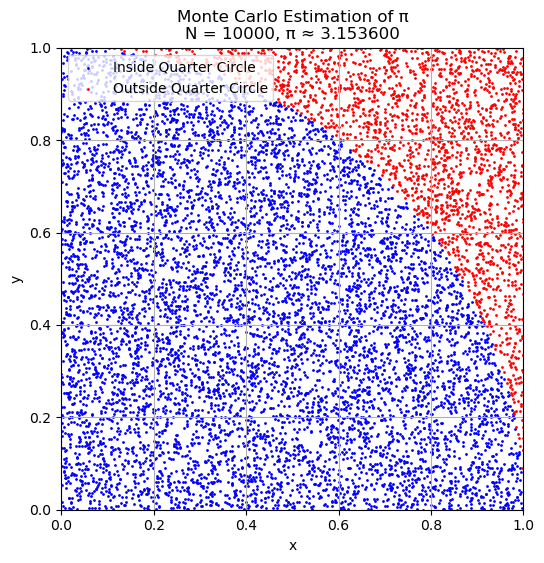

In [12]:
# Your code here

def estimate_pi(N):
    x = np.random.rand(N)
    y = np.random.rand(N)

    inside = x**2 + y**2 <= 1

    pi_est = 4 * np.sum(inside) / N
    return pi_est, x, y, inside

# Part 1: Estimate π for various N values
for N in [10, 10**3, 10**5, 10**6]:
    pi_approx, _, _, _ = estimate_pi(N)
    print(f"N = {N:<7} --> π ≈ {pi_approx:.6f}")

# Part 2: Plot for N = 10^4
N = 10**4
pi_approx, x, y, inside = estimate_pi(N)

plt.figure(figsize=(6, 6))
plt.scatter(x[inside], y[inside], color='blue', s=1, label='Inside Quarter Circle')
plt.scatter(x[~inside], y[~inside], color='red', s=1, label='Outside Quarter Circle')

plt.title(f"Monte Carlo Estimation of π\nN = {N}, π ≈ {pi_approx:.6f}")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("square")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()


# Point-Spread Function

*Based on Astro 120 curriculum.*

When telescopes look at very distant sources (like stars or galaxies), the light they capture should look like a point source (focused point of light, think of a dot) on the detector.

However, due to the diffraction-limit of a telescope, atmospheric turbulence and imperfections in an optical system, the star does not appear like a point. Rather, it becomes a blurry spot on the detector which we model with a **point-spread function** (PSF).

To better visualize what the above paragraph is talking about, you will simulate the transition from a point source to a point-spread function using a 2D Gaussian function.

We can represent a point source as a single bright pixel in an image.

There is an example point-source vs. point-spread function plot in the homework 9 folder.


In [13]:
# @title Simulate a Point Source:
# @markdown Start by creating a 2D image (plot) of size 50×50 pixels. Represent a point source by setting the very center pixel (25,25) to have a brightness of 1.0, while all other pixels should have a value of 0.0.


image_size = 50
point_source = np.zeros((image_size, image_size))

center = image_size // 2
point_source[center, center] = 1.0


In [14]:
# @title Simulate the Point Spread:
# @markdown Now, model a PSF by plotting a 2D Gaussian function to simulate the spread of light from the point source. The Gaussian function is defined as:

# @markdown $$ \text{PSF}(x, y) = A \cdot \exp\left(-\frac{(x - x_0)^2}{2\sigma^2} - \frac{(y - y_0)^2}{2\sigma^2}\right) $$

# @markdown Where:
# @markdown - $A$ is the amplitude (brightness) of the point source.
# @markdown - $x_0$, $y_0$ are the coordinates of the center of the PSF.
# @markdown - σ controls how much the light spreads out from the center.

# @markdown Use $A = 1.0$, center the PSF at (25, 25) and use $\sigma = 3$.

# @markdown This part of the problem is very similar to problem #1 in this homework assignment.

# parameters
A = 1.0
sigma = 3.0
x0, y0 = center, center

# coordinate grid
x = np.arange(image_size)
y = np.arange(image_size)
X, Y = np.meshgrid(x, y)

psf = A * np.exp(-((X - x0)**2 + (Y - y0)**2) / (2 * sigma**2))


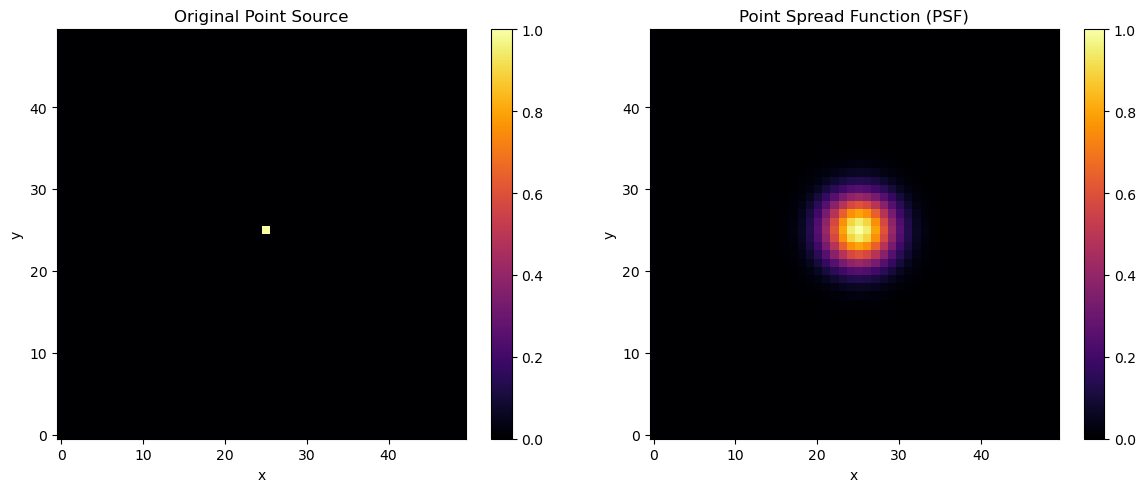

In [15]:
# @title Visualize the Transition:
# @markdown Create two plots (horizontal subplots):

# @markdown The first plot should display the original point source (a single bright pixel).
# @markdown The second plot should display the resulting point spread function (PSF), showing how the light spreads out from the point source.

# @markdown All you should be doing at this point is just taking your plots from step 1 and step 2 and turning them into subplots.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# point source
im1 = ax1.imshow(point_source, cmap='inferno', origin='lower')
ax1.set_title("Original Point Source")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
fig.colorbar(im1, ax=ax1, fraction=0.046)

# psf
im2 = ax2.imshow(psf, cmap='inferno', origin='lower')
ax2.set_title("Point Spread Function (PSF)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
fig.colorbar(im2, ax=ax2, fraction=0.046)

plt.tight_layout()
plt.show()


In [16]:
# @title Bonus (just for fun):
# @markdown Try changing the value of $\sigma$ How does this affect the spread of light in the PSF?